In [85]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rc('axes', unicode_minus=False)

df_raw1=pd.read_csv("cvs_users.csv", encoding='euc-kr')
df_raw1.shape

(2122, 4)

In [112]:
df_raw1.isnull().sum()
#결측치 없음
df_raw2.isna().head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


cvs_users	idUser	고객ID	문자	U100001	
cvs_users	Gender	성별	문자	남성	
cvs_users	AgeGroup	연령대	문자	40대	개인/기업/업체..개인 한정?
cvs_users	UserYear	등급확인년도	숫자	2020	
cvs_users	UserPOSClass	구매빈도 등급((임의로 분류)	문자	3.주 2~3회 정도	"구매빈도 기준으로 임의로 분류된 것으로 정의 필요 
 ->목표변수와 연계하여 정의 및 분석에 활용해야 함"
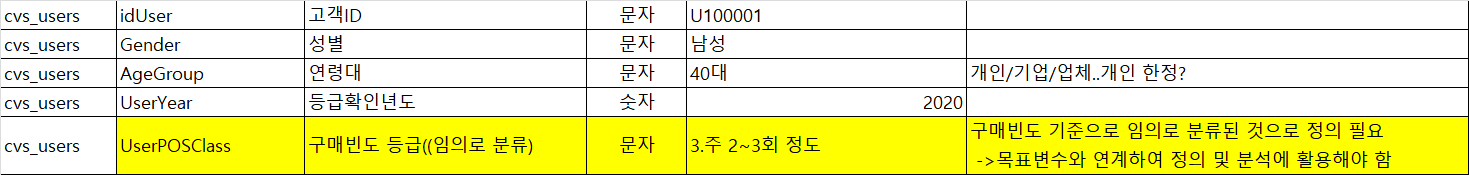

KeyError: 'cvs_idUser'

In [100]:
df_raw2=pd.read_csv("cvs_sales.csv", encoding='cp949')
df_raw2.shape

(510223, 11)

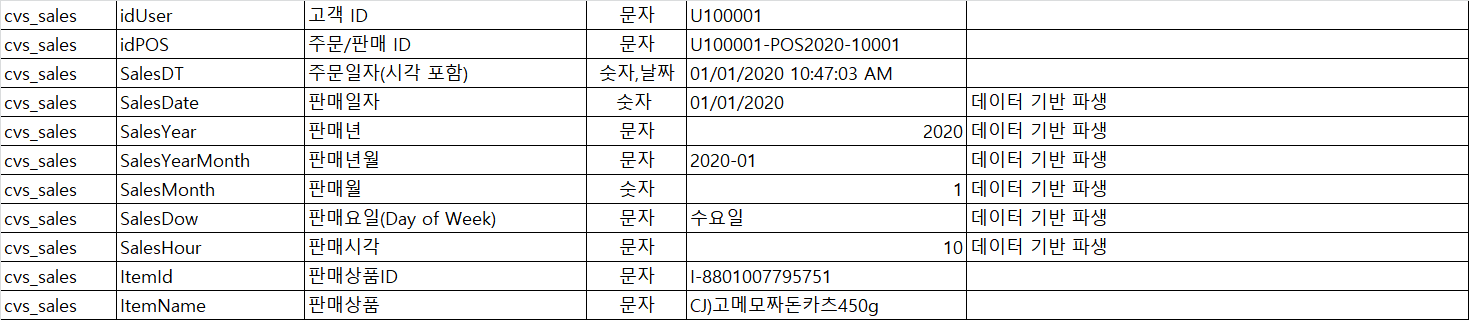

In [106]:
df_raw2.isnull().sum()
#결측치 없음

idUser            0
idPOS             0
SalesDT           0
SalesDate         0
SalesYear         0
SalesYearMonth    0
SalesMonth        0
SalesDow          0
SalesHour         0
ItemId            0
ItemName          0
dtype: int64

In [114]:
df_raw2['ItemId'].count()

510223

In [115]:
df_raw3=pd.read_csv("cvs_weather.csv", encoding='euc-kr')
df_raw3.shape

(731, 13)

In [116]:
df_raw3.isnull().sum()
#4개변수에서 결측치 확인 

AreaId               0
Area                 0
dateObs              0
TempAvg              0
TempMin              0
hhmiTempMin          0
TempMax              0
hhmiTempMax          0
hourRainfall       420
RainfallAmount     420
HumidAvg             0
SnowloadMax        707
hhmiSnowloadMax    712
dtype: int64

In [127]:
df_raw3.head(50)

,AreaId,Area,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
0,108,서울,2020-01-01,-2.2,-6.5,1,0.3,1457,9.83,0.1,64.4,0.0,NaN
1,108,서울,2020-01-02,1.0,-0.7,1,3.8,1500,NaN,NaN,65.4,NaN,NaN
2,108,서울,2020-01-03,-0.1,-3.4,807,4.6,1547,NaN,NaN,56.9,NaN,NaN
3,108,서울,2020-01-04,1.2,-2.8,512,6.1,1450,NaN,NaN,50.8,NaN,NaN
4,108,서울,2020-01-05,1.3,-3.2,821,6.6,1453,NaN,NaN,45.6,NaN,NaN
5,108,서울,2020-01-06,3.1,0.6,53,4.6,1158,14.33,1.8,65.4,NaN,NaN
6,108,서울,2020-01-07,6.3,4.2,1,7.7,2350,24.00,46.3,95.0,NaN,NaN
7,108,서울,2020-01-08,2.4,-0.4,2336,8.9,47,9.50,11.6,86.1,NaN,NaN
8,108,서울,2020-01-09,-1.2,-3.1,2349,2.0,1534,NaN,NaN,65.3,NaN,NaN
9,108,서울,2020-01-10,-0.6,-4.3,453,4.2,1534,NaN,NaN,62.9,NaN,NaN


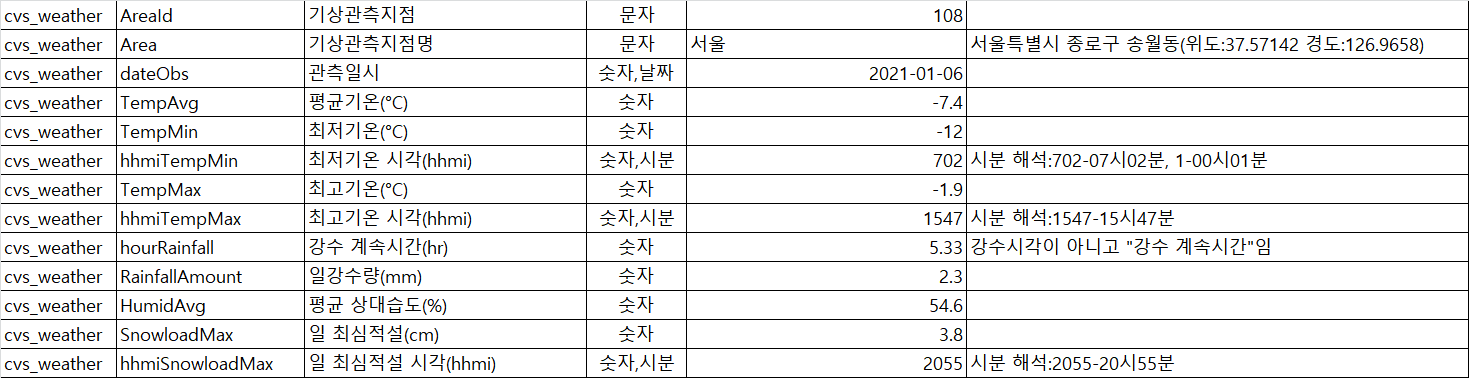

In [90]:
df_raw4=pd.read_csv("cvs_items.csv", encoding='cp949')
df_raw4.shape

(4308, 9)

In [94]:
df_raw4.isnull().sum()
#Item_CatORMaker 결측치 확인

ItemIdLarge         0
ItemNameLarge       0
ItemIdMiddle        0
ItemNameMiddle      0
ItemId              0
ItemName            0
Item_CatORMaker    17
Price               0
ImageUrl            0
dtype: int64

In [122]:
df_raw4.head()

,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemId,ItemName,Item_CatORMaker,Price,ImageUrl
0,L1,간편식사,M1,도시락,I-8801068371857,샐)치킨찹찹샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,L1,간편식사,M1,도시락,I-8801068371864,샐)퀴노아바질샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,L1,간편식사,M1,도시락,I-8801068378887,샐)에그가먼저닭샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,L1,간편식사,M1,도시락,I-8801068388664,샐)흑임자치킨샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,L1,간편식사,M1,도시락,I-8801068389340,면)나폴리탄파스타,면,4000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


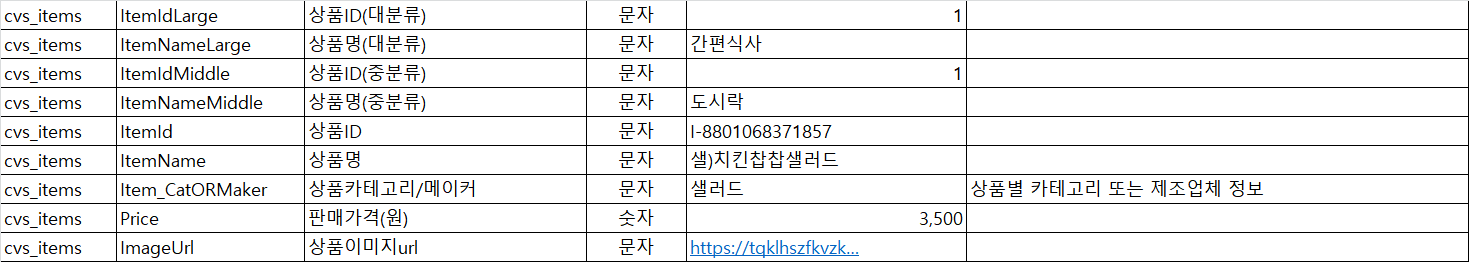

,ItemNameLarge,ItemNameMiddle,ItemName,Price
0,간편식사,도시락,샐)치킨찹찹샐러드,3500
1,간편식사,도시락,샐)퀴노아바질샐러드,3500
2,간편식사,도시락,샐)에그가먼저닭샐러드,3500
3,간편식사,도시락,샐)흑임자치킨샐러드,3500
4,간편식사,도시락,면)나폴리탄파스타,4000
5,간편식사,도시락,면)파마산크림치즈파스타,4300
6,간편식사,도시락,샐)로제치킨미니샐러드,3500
7,간편식사,도시락,샐)프로틴치즈소시지볼,4800
8,간편식사,도시락,샐)프로틴치킨에그볼,4800
9,간편식사,도시락,샐)프로틴콩단백볼샐러드,4800


2122